In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### 1. Load Processed BLS CSVs

In [2]:
#codes = ['11', '21', '51', '52', '54']
codes = ['51', '52', '54']
path = 'my_naics_chg/naics_'
typology = 'type_kurt20'

urban = []
rural = []

for code in codes:
    df = pd.read_csv(path + code + '.csv')
    df['fips'] = df['fips'].astype(str).str.zfill(5)
    df = df.set_index('fips')

    temp = df.groupby([typology]).sum().iloc[0,:4].tolist()
    temp.insert(0, (df.groupby([typology]).sum().iloc[0,:4].name + '_' + code))
    urban.append(temp)
    
    temp = []
    temp = df.groupby([typology]).sum().iloc[2,:4].tolist()
    temp.insert(0, (df.groupby([typology]).sum().iloc[2,:4].name + '_' + code))
    rural.append(temp)
    
    u = pd.DataFrame(urban, columns = ['naics', '1990', '2000', '2010', '2020']).set_index('naics')
    r = pd.DataFrame(rural, columns = ['naics', '1990', '2000', '2010', '2020']).set_index('naics')
    
    u.to_csv('analysis/visuals/urban.csv')
    r.to_csv('analysis/visuals/rural.csv')

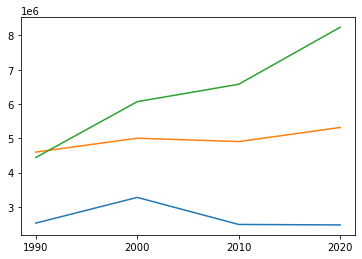

In [3]:
plt.plot(u.T)

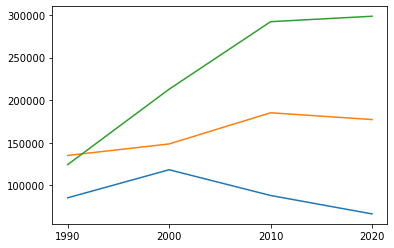

In [4]:
plt.plot(r.T)